# Homework 2
http://wiki.quantsoftware.org/index.php?title=CompInvestI_Homework_2<br>
http://wiki.quantsoftware.org/index.php?title=QSTK_Tutorial_9

In [1]:
import pandas_datareader.data as web
from lib import DataAccess as da
from lib import qsdateutil as du
from lib import EventProfiler as ep
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
dataobj = da.DataAccess('Yahoo')

## Event:
The event is defined as when the actual close of the stock price drops below $5.00.

In [3]:
def event5(df_closes, cut_off = 5.0):
    df_events = df_closes.copy()*np.NAN
    n = len(df_closes)
    for col in df_closes:
        for i in range(n-1):
            if df_closes[col][i+1]<cut_off and df_closes[col][i]>= cut_off:# and i>20 and i<(n-20):
                df_events[col][i+1] = 1
    return df_events

## S&P 500 stocks 2008:
#### Get data:

In [4]:
#date
startdate = dt.datetime(2008, 1, 1) 
enddate = dt.datetime(2009, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(startdate, enddate, dt_timeofday)

#data
symbols =  dataobj.get_symbols_from_list("sp5002008")
symbols.append('SPY')
keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = dataobj.get_data(timestamps, symbols, keys)
data2008 = dict(zip(keys, ldf_data))

#remove NAN from price data
for s_key in keys:
    data2008[s_key] = data2008[s_key].fillna(method = 'ffill')
    data2008[s_key] = data2008[s_key].fillna(method = 'bfill')
    data2008[s_key] = data2008[s_key].fillna(1.0)

#### Event Matrix

In [5]:
df_events08 = event5(data2008['actual_close'])
print(df_events08.sum().sum(), 'events')
df_events08.head()

(331.0, 'events')


,FMCC,FNMA,A,AA,AAPL,ABC,ABI,ABKFQ,ABT,ACAS,...,XL,XLNX,XOM,XRX,XTO,YHOO,YUM,ZION,ZMH,SPY
2008-01-02 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot

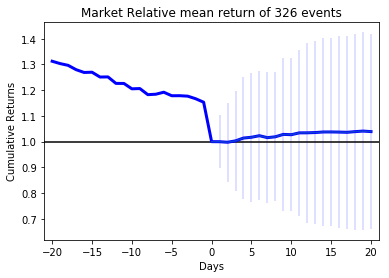

In [6]:
ep.eventprofiler(df_events08, data2008, i_lookback=20, i_lookforward=20,
                 b_market_neutral=True, b_errorbars=True, s_market_sym='SPY')

## S&P 500 stocks 2012:
#### Get data:

In [7]:
#date
startdate = dt.datetime(2008, 1, 1) 
enddate = dt.datetime(2009, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(startdate, enddate, dt_timeofday)

#data
symbols =  dataobj.get_symbols_from_list("sp5002012")
symbols.append('SPY')
keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = dataobj.get_data(timestamps, symbols, keys)
data2012 = dict(zip(keys, ldf_data))

#remove NAN from price data
for s_key in keys:
    data2012[s_key] = data2012[s_key].fillna(method = 'ffill')
    data2012[s_key] = data2012[s_key].fillna(method = 'bfill')
    data2012[s_key] = data2012[s_key].fillna(1.0)

#### Event Matrix

In [8]:
df_events12 = event5(data2012['actual_close'],cut_off = 5)
print(df_events12.sum().sum(), 'events')
df_events12.head()

(180.0, 'events')


,A,AA,AAPL,ABC,ABT,ACE,ACN,ADBE,ADI,ADM,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZION,ZMH,SPY
2008-01-02 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot

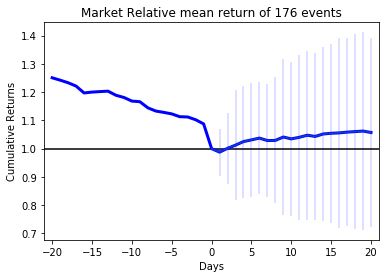

In [9]:
ep.eventprofiler(df_events12, data2012, i_lookback=20, i_lookforward=20,
                b_market_neutral=True, b_errorbars=True, s_market_sym='SPY')

## Extra challenges
Find the best cut-off price to maximize the return 5 days after the event.

In [10]:
from scipy.optimize import minimize

Get std/mean of all returns in 'days=5' days after the event. <br>
The less return is the best.

In [11]:
def meanReturn5days(df_events_arg,data,days = 5):
    #copys
    df_events = df_events_arg.copy()
    closes = data['close'].copy()
    
    # Removing the starting and the end events
    df_events.iloc[0:days] = np.NaN
    df_events.iloc[-days:] = np.NaN
    
    # Get all returns in 'days' days after the event
    ls_ret = list()
    for i, s_sym in enumerate(df_events.columns):
        for j, dt_date in enumerate(df_events.index):
            if df_events[s_sym][dt_date] == 1:
                ls_ret.append(closes[s_sym][j + days])
    
    return np.std(ls_ret)/np.mean(ls_ret)

Function to minimize:

In [12]:
def f(x,data):
    df_events = event5(data['actual_close'],cut_off = x)
    return meanReturn5days(df_events,data)

In [13]:
%%time
x0 = 5
res = minimize(f, x0, args = data2012, method='Nelder-Mead',
            options={'maxiter': 100, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.966832
         Iterations: 17
         Function evaluations: 40
CPU times: user 4min 20s, sys: 816 ms, total: 4min 21s
Wall time: 4min 19s


Result:

In [14]:
res.x[0]

6.4375

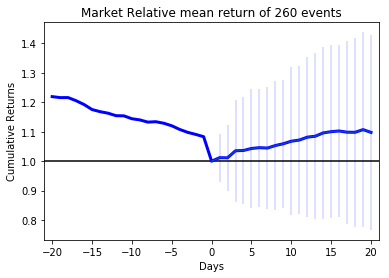

In [15]:
df_events = event5(data2012['actual_close'],cut_off = res.x[0])
ep.eventprofiler(df_events, data2012, i_lookback=20, i_lookforward=20,
                b_market_neutral=True, b_errorbars=True, s_market_sym='SPY')